In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read data

In [2]:
data_path = "../data/MentalRotation.csv"
df = pd.read_csv(data_path)

In [3]:
df.head()

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex
0,49,1,0,0,n,3107,1,32,M
1,49,2,150,0,n,2930,1,32,M
2,49,3,150,1,b,1874,1,32,M
3,49,4,100,1,b,3793,1,32,M
4,49,5,50,1,b,2184,1,32,M


## What is the distribution of subject performance

In [70]:
dd = df.groupby("Subject").apply(lambda dd: dd[["Correct", "Time"]].mean())
dd.rename(columns={"Correct": "FractionCorrect", "Time": "AvgTime"}, inplace=True)

In [71]:
dd["Sex"] = df.groupby("Subject").apply(lambda dd: dd[["Sex"]].iloc[0])
dd["Age"] = df.groupby("Subject").apply(lambda dd: dd[["Age"]].iloc[0])

<Axes: xlabel='FractionCorrect', ylabel='Count'>

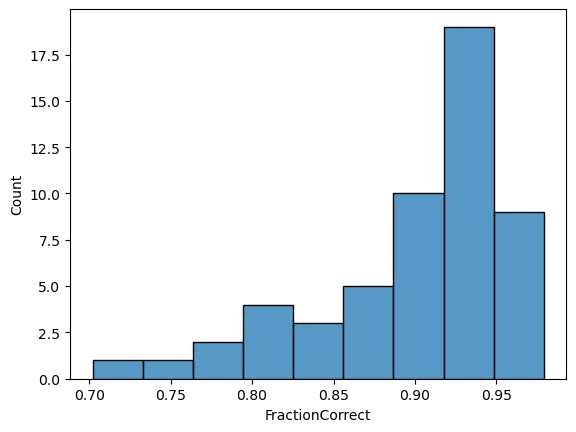

In [72]:
sns.histplot(data=dd, x="FractionCorrect")

## Did slower participants perform better?

<Axes: xlabel='AvgTime', ylabel='FractionCorrect'>

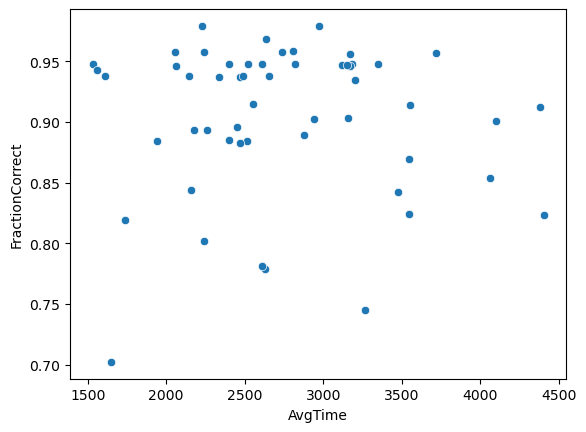

In [73]:
sns.scatterplot(data=dd, x="AvgTime", y="FractionCorrect")

## Differences in performance and speed between male and female

<Axes: xlabel='AvgTime', ylabel='FractionCorrect'>

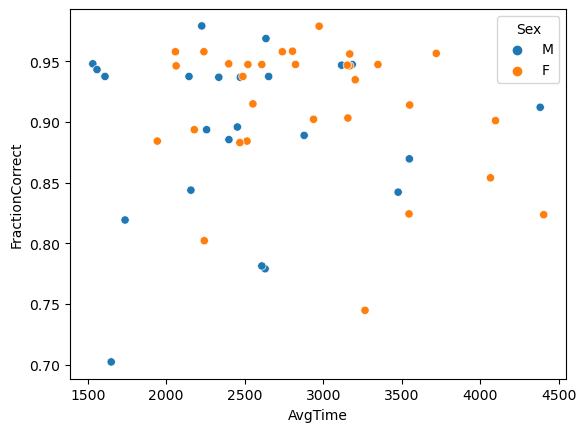

In [74]:
sns.scatterplot(data=dd, x="AvgTime", y="FractionCorrect", hue="Sex")

<Axes: xlabel='Sex', ylabel='FractionCorrect'>

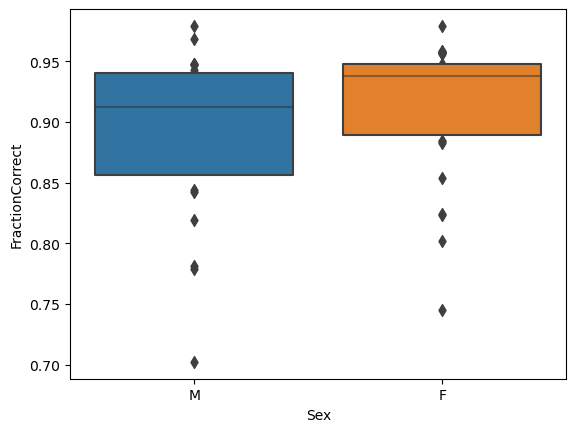

In [75]:
sns.boxenplot(data=dd, x="Sex", y="FractionCorrect")

<Axes: xlabel='Sex', ylabel='AvgTime'>

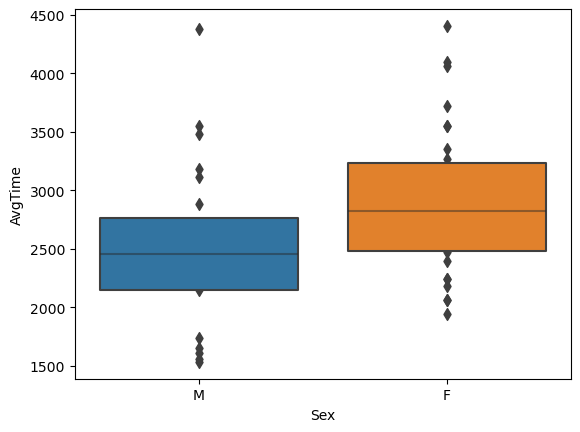

In [76]:
sns.boxenplot(data=dd, x="Sex", y="AvgTime")

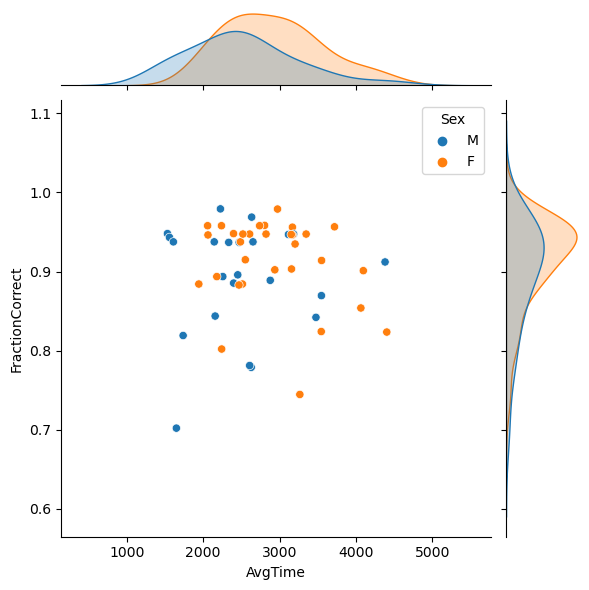

In [77]:
sns.jointplot(data=dd, x="AvgTime", y="FractionCorrect", hue="Sex")

## Is age a factor?

<Axes: xlabel='Age', ylabel='Count'>

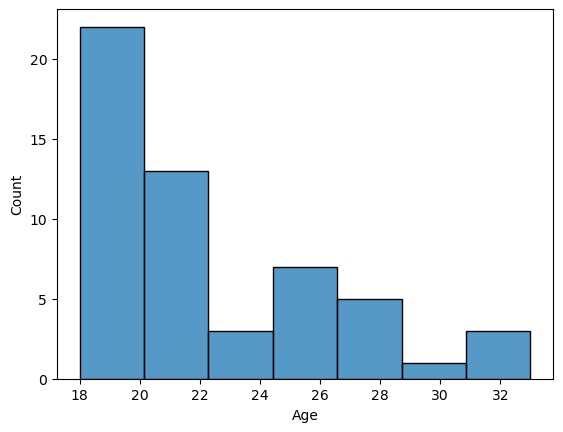

In [79]:
sns.histplot(data=dd, x="Age")

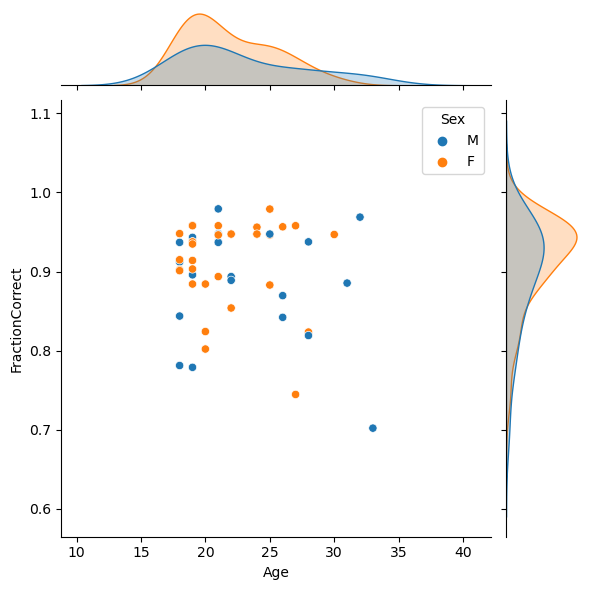

In [80]:
sns.jointplot(data=dd, x="Age", y="FractionCorrect", hue="Sex")

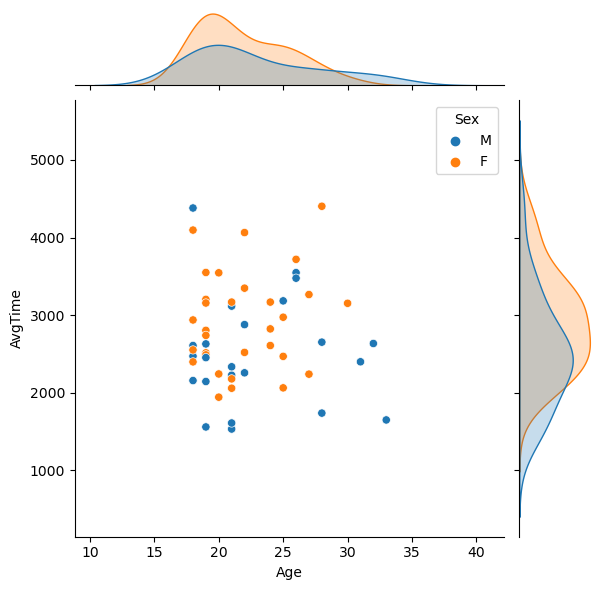

In [81]:
sns.jointplot(data=dd, x="Age", y="AvgTime", hue="Sex")

In [87]:
np.corrcoef(dd[["Age", "AvgTime"]].values.T)[0, 1]

0.009559582241967488

In [88]:
np.corrcoef(dd[["Age", "FractionCorrect"]].values.T)[0, 1]

-0.15481702089447874